## Import the Libraries

In [1]:
import re
import nltk
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
import string

#### Read the CSV File 

In [2]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin1')

#### Check The Top 5 Roes

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Shape

In [4]:
df.shape

(5572, 5)

#### Null Values

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Check the Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop the unvanted columns

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Rename the columns

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Encoding 

In [9]:
# label encoding with categorical columns
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()

In [10]:
df['target']=encod.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Check the nullvalues
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# Check the Duplicated value
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep='first')


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
df.duplicated().sum()

403

In [15]:
df.shape

(5572, 2)

In [16]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

### Data Visualization

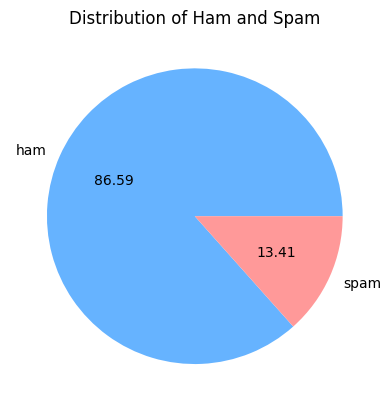

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

### Do The Natural Language Toolkit 

In [18]:
import nltk

In [19]:
# calculate the length (number of characters) of each text column
df['num_char'] = df['text'].apply(len)

#### Tokenize

In [20]:
#  tokenizing the text into words using NLTK  word_tokenize function
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
# tokenizing the num_sentences text into  using NLTK  word_tokenize function
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### Check the Describe

In [23]:
# provides descriptive statistics (like count, mean, std, min, max, etc.) for the columns
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.501256,1.991565
std,59.690841,13.637056,1.501427
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,219.000000,38.000000


In [24]:
# select only the rows where the target column has a value of 0.
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.076062,1.832332
std,58.016023,13.875446,1.431214
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [25]:
#  filter the DataFrame  and select only the rows where the target column has a value of 1.
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.706827,3.020080
std,29.183082,6.768560,1.538034
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


#### Corelation 

<Axes: >

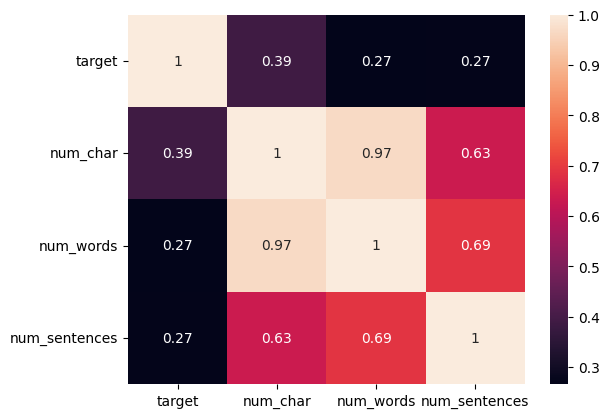

In [26]:
# apply the Heatmap to the numerical columns
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [27]:
def transform_text(text):
    text = text.lower() #converts the entire text to lowercase to ensure aviodtreating the same word with different cases as different words.
    text = nltk.word_tokenize(text) #breaks the text into individual words
    ps = PorterStemmer() #reduce words to their root form, helping to standardize different forms of a word.
    
    y = []
    for i in text:    #removes any tokens that contain non-alphanumeric characters
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
 # is condition checks whether each token is neither a stopword (common, uninformative words) nor punctuation.
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [28]:
# column at the specific row index
df['text'][432]

'Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX'

In [29]:
# Converts the text to lowercase,Tokenizes it into individual words,Removes non-alphanumeric characters,Filters out stopwords and punctuation,Stems the remaining words to their root forms.
transform_text("Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX")

'congrat nokia 3650 video camera phone call 09066382422 call cost 150ppm ave call 3min vari mobil close 300603 post bcm4284 ldn wc1n3xx'

In [30]:
#standardizing and cleaning the text data
df['transformed_text'] = df['text'].apply(transform_text)

In [31]:
df['transformed_text']

0       go jurong point avail bugi n great world la e ...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5572, dtype: object

In [32]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [34]:
X = cv.fit_transform(df['transformed_text']).toarray()
print(X.shape)
y=df['target'].values

(5572, 6629)


#### TFIDF Vectorizer

In [35]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)
y=df['target'].values

(5572, 3000)


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

In [37]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### Gaussian distribution

In [38]:
#  Gaussian (normal) distribution ,predict categoricals
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.862780269058296


#### multinomial distribution

In [39]:
# calculating the probability of each class given the features (like words in a text)
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9641255605381166


#### Bernoulli distribution

In [40]:
#binary or multinomial text classification tasks.
#  calculates the probability of each class based on whether features are present or absent in the data
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))


0.9766816143497757


## LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

#### Predict

In [42]:
#  prdetc
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Accuracy

In [43]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9542600896860987

## Support vector Classifier

In [44]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid')

#### Predict

In [45]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Accuracy

In [46]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9721973094170404